In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [3]:
import pandas as pd
df = pd.read_csv (r"C:\Users\Akshay\Desktop\CP1\df_finalRF.csv")

In [4]:
#first few rows
df.head()

,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,Life_expectancy
0,5.371610,0.743836,2.998958,0.237777,-0.510412,0.460348,-0.445672
1,4.965979,0.421790,0.790446,1.160532,0.044961,0.460348,-0.982602
2,4.993136,0.310608,2.576559,0.233631,-0.346038,0.460348,-0.982602
3,4.960212,0.056763,1.563015,0.814386,0.325235,0.460348,-1.024714
4,5.065702,-0.162623,1.483289,0.755846,0.209046,0.460348,-1.056298


# Data Partition 

In [5]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df.drop('Life_expectancy', axis = 1)
Y = df[['Life_expectancy']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [6]:
X_train.shape

(2049, 6)

# MODEL BUILDING

In [8]:
from sklearn.ensemble import RandomForestRegressor

# by default 100 tree will be form 
Model = RandomForestRegressor(n_estimators=25, # make 20 tress
                               criterion="absolute_error",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=4,
                      max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=25)

# Random Forest Visualization

In [9]:
from sklearn.tree import export_graphviz
import pydot

In [10]:
list(X.columns)

['Data PC1', 'Data PC2', 'Data PC3', 'Data PC4', 'Data PC5', 'Status']

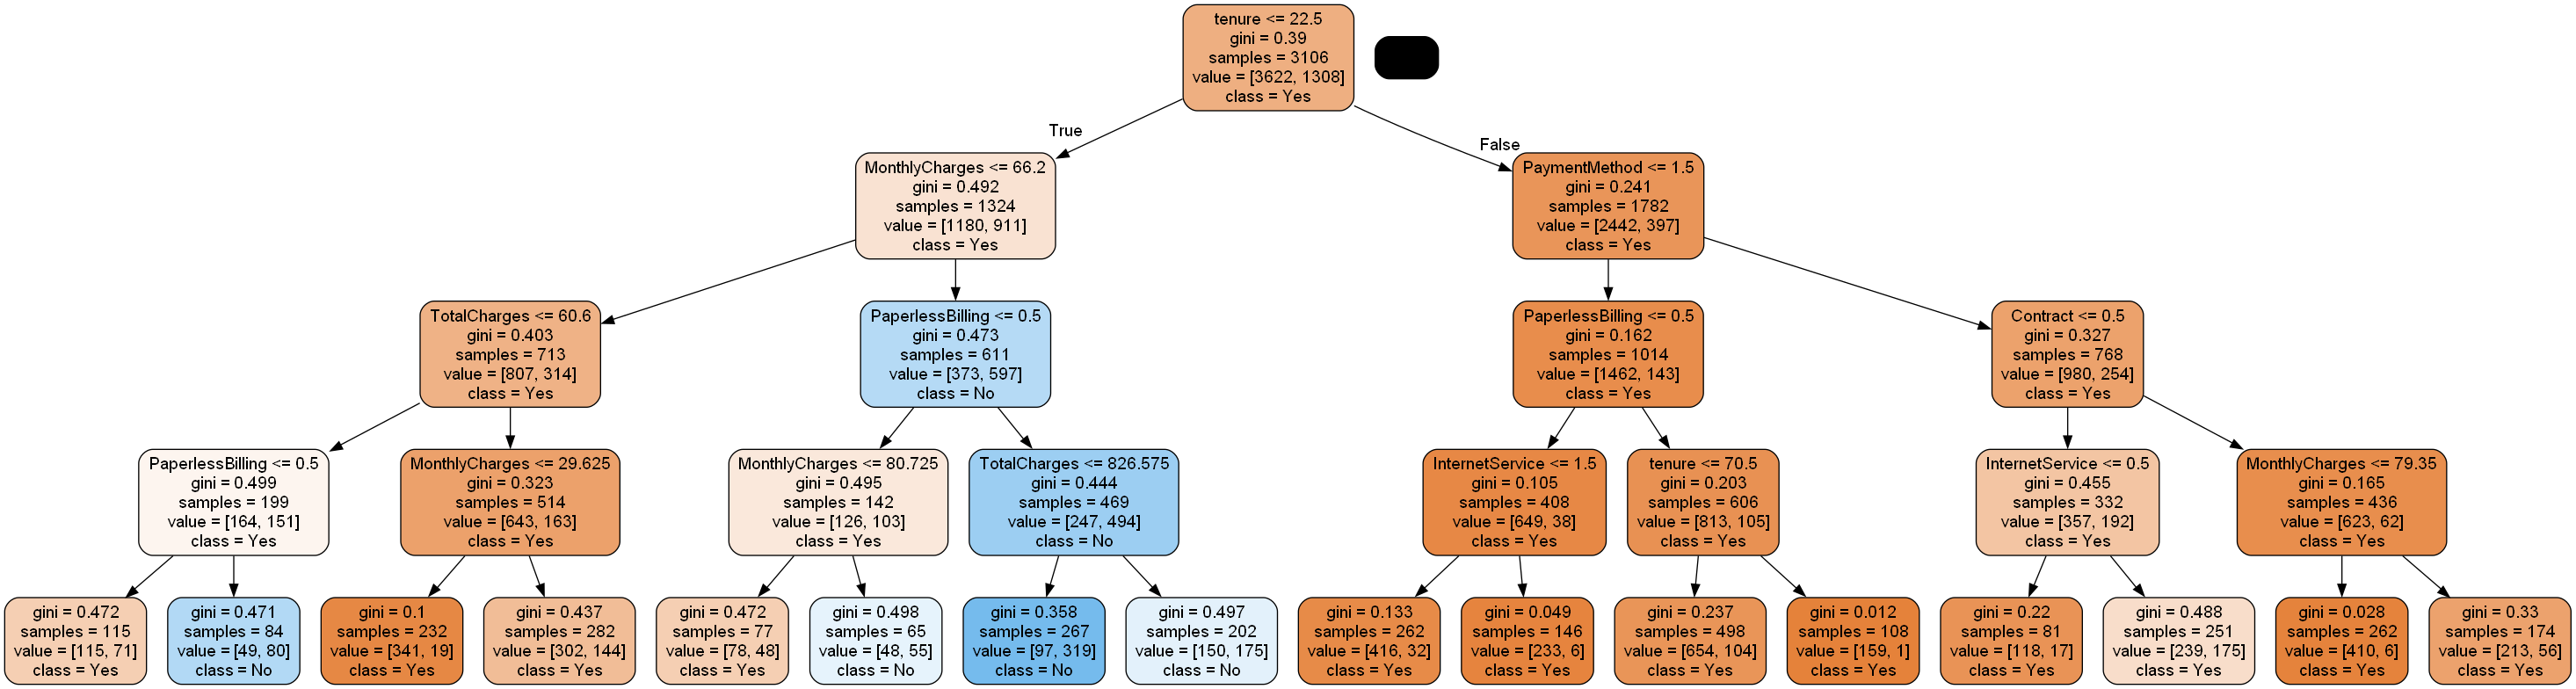

In [36]:
feature_list = list(X.columns)  # all independent variable name
Churn = ['Yes','No'] 

tree = Model.estimators_[23]  # specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names = Churn,
                rounded = True, 
                filled=True)
(graph,) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [11]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,Life_expectancy
1638,-2.160031,1.388315,-1.320794,-0.618701,-0.625035,-2.172268,1.344093
266,-1.310089,-0.966984,-0.913681,0.246944,0.443689,0.460348,-0.024551
1456,-0.828124,0.091239,-0.865854,-0.284237,-1.390211,0.460348,0.596603
676,-4.141585,0.807212,0.451786,0.972413,1.120266,-2.172268,1.101948
1265,-4.036947,0.559869,0.519538,1.099978,0.101818,0.460348,1.365149


In [12]:
train['Predicted']=Model.predict(X_train)
train.head()

,Data PC1,Data PC2,Data PC3,Data PC4,Data PC5,Status,Life_expectancy,Predicted
1638,-2.160031,1.388315,-1.320794,-0.618701,-0.625035,-2.172268,1.344093,0.842748
266,-1.310089,-0.966984,-0.913681,0.246944,0.443689,0.460348,-0.024551,0.302660
1456,-0.828124,0.091239,-0.865854,-0.284237,-1.390211,0.460348,0.596603,0.343719
676,-4.141585,0.807212,0.451786,0.972413,1.120266,-2.172268,1.101948,1.024041
1265,-4.036947,0.559869,0.519538,1.099978,0.101818,0.460348,1.365149,0.393833


# Step 7 : Model Performance Metrics

In [19]:
life_ex=Model.predict(X_train)

In [20]:
mse= mean_squared_error(y_train,life_ex)
r2=r2_score(y_train,life_ex)
print (mse)
print (r2)

0.2356553946515369
0.7641139351468773


In [17]:
y_pred=Model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
mse= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print (mse)
print (r2)

0.2548975789866958
0.7456434147102722


In [48]:
import pickle

pickle.dump(Model, open('RF_Model.pkl','wb'))  # Exporting model from python to laptop

# Business Use Case -- Live Data

In [49]:
Finalmodel=pickle.load(open('RF_Model.pkl','rb'))  # import Model from laptop to python 

In [50]:
Live_data=X_test.iloc[0:4,:]
Live_data

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group
6692,41,74.65,3090.65,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,2
2624,17,66.70,1077.05,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,3,1
1076,58,24.50,1497.90,0,0,1,1,1,1,2,0,0,0,0,0,0,1,1,1,3
1428,1,50.45,50.45,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,0


In [51]:
Live_data['Predicted']=Finalmodel.predict(Live_data)
Live_data

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,Predicted
6692,41,74.65,3090.65,0,0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,2,0
2624,17,66.70,1077.05,1,0,1,1,1,1,0,...,1,1,1,0,0,0,1,3,1,0
1076,58,24.50,1497.90,0,0,1,1,1,1,2,...,0,0,0,0,0,1,1,1,3,0
1428,1,50.45,50.45,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,2,0,1


* 0 = customer will not churn
* 1 = Customer will Churn ( keep a eye on this )